In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # para nós dividirmos os dados entre treino e test 
from sklearn.naive_bayes import GaussianNB # para utilizar o naive bayse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score # para criar a matriz de confusão 
from sklearn.tree import DecisionTreeClassifier # importando a arvore de decisão
# from yellowbrick.classifier import ConfusionMatrix # vamos criar uma matriz de confusão de forma visual/gráfica
from sklearn.tree import export_graphviz
import graphviz

In [3]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


Vamos fazer um formato matriz 

In [5]:
previsores = credito.iloc[:, 0:20].values
classe  =credito.iloc[:, 20].values

vamos transformar os atributos categoricos em atributos númericos, passando o indice de cada coluna catégorica (vai ser as colunas de texto os númericos não precisa)

Precisamos criar um objeto para cada atributo catégorico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste

se forem ultilizados objetos diferentes, o número atributos a cada a valor poderá ser diferente, o que deixará o teste inconsistente


In [6]:
labelencoder1 = LabelEncoder()
previsores[:, 0] = labelencoder1.fit_transform(previsores[:, 0])

labelencoder2 = LabelEncoder()
previsores[:, 2] = labelencoder2.fit_transform(previsores[:, 2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])


Divisão da base de dados entre treinamento e teste (30% para testar e 7% para treinar)

train test split dividi 4 objetos que nós vamos ultilizar 


In [8]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, 
                                                                  classe, 
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

Criação e treinamento do modelo (geração da tabela de probabilidades)

In [9]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

previsões ultilizados do modelo (geração da tabela de probabilidades)

In [10]:
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

Vamos comparar a previsão com o que de fato com o que aconteceu 

Geração damatriz de confusão e calculo da taxa de acerto e erro 

y_teste é um modelo de teste que eu criei por que y_teste é o mesmo que x_teste

In [11]:
confusao = confusion_matrix(y_teste, previsoes)
confusao 

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

41 e 172 foi o que ele acertou, 42 e 45 foi o que ele errou 

vamos medir a taxa acerto

In [12]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

A taxa de acerto é de 71% 

Visualização da matriz de confusão 


<bound method Visualizer.poof of ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002A58717A8F0>,
                estimator=GaussianNB())>

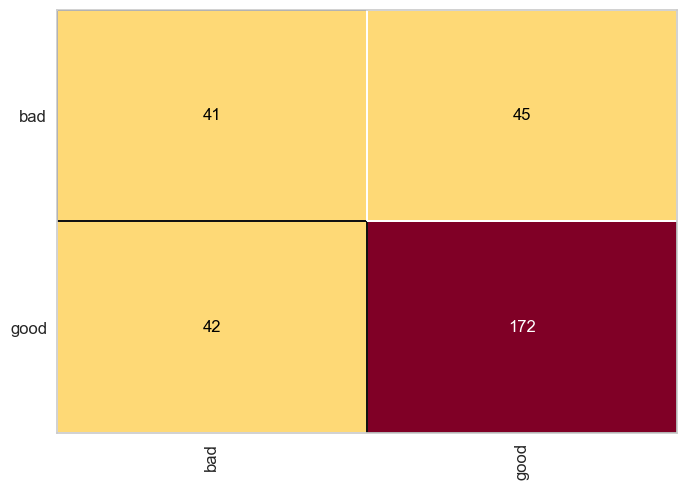

In [13]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof

Agora vamos prever com o novo registro, transformando os atributos catégoricos em numéricos

In [14]:
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape

(1, 20)

In [15]:
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


Vamos usar o mesmo objeto que foi criado antes, para manter o padrão dos dados 

In [16]:
novo_credito = novo_credito.iloc[:, 0:20].values

novo_credito[:,0] = labelencoder1.fit_transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder2.fit_transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder3.fit_transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder4.fit_transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder5.fit_transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder6.fit_transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder7.fit_transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder8.fit_transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder9.fit_transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder10.fit_transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder11.fit_transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder12.fit_transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder13.fit_transform(novo_credito[:,19])

In [17]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

Pelo modelo gerado ele vai ser um bom pagador mas como o modelo só gera 71% de acerto vamos gerar outros tipos de modelo para uma melhor compreenssão 